<h4><span style='color:blue'>13.</span></h4>


<p><strong>Computer Lab – Chemical Kinetics 1</strong></p>
<p><strong>Goal</strong>: The purpose of this lab is to become familiar with modeling a simple ligand binding reaction.</p>
<p><strong>Introduction</strong></p>
<p>Consider a binding reaction where ligand (L) binds to a protein receptor (R) to form a loosely bound encounter complex (L∙R), and finally a tightly bound product (P) with the forward and backward rate constants $k_{f}$ and $k_{b}$, respectively.<a href="#fn_note1" class="footnote-ref" id="fn_note1"><sup>1</sup></a></p>

$$L + R \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} L\cdot R \stackrel{k_{f2}}{\rightarrow} P \tag{1}$$

<p>Let’s walk through the steps of how to build a model of this receptor-ligand reaction using Python.</p>

First, we need to write out the elementary rate equations:

\begin{align*}
    \frac{d[L]}{dt} &= \frac{d[R]}{dt} = -k_{f1}[L][R] - k_{b1}[L\cdot R] \tag{1.1}\\
    \frac{d[L\cdot R]}{dt} &= k_{f1}[L][R] -k_{b1}[L\cdot R] - k_{f2}[L\cdot R] \tag{1.2}\\
    \frac{d[P]}{dt} &=  k_{f2}[L\cdot R] \tag{1.3}
\end{align*}

Next, we apply steady state on $d[L\cdot R]/dt$:

\begin{equation}
k_{b1}[L\cdot R] = k_{f1}[L][R] - k_{f2}[[L\cdot R]
 \implies \boxed{[L\cdot R] = \left( \frac{k_{f1}}{k_{b1}+k_{f2}} [L][R]\right)}
\end{equation}

Now, we take $[L\cdot R]$ and substitute into equations ${1.1}$ and ${1.3}$. 

\begin{align}
    \frac{d[L]}{dt} &= \frac{d[R]}{dt} = -k_{f1}[L][R] + k_{b1}\left(\frac{k_{f1}}{k_{b1}+k_{f2}} [L][R] \right) \tag{1.1a}\\
    \frac{d[P]}{dt} &=  k_{f2} \left( \frac{k_{f1}}{k_{b1}+k_{f2}} [L][R]\right) \tag{1.3a}
\end{align}




<p><strong>Procedure</strong></p>
<ol class="incremental" type="1">
<li><p>Set initial concentration of ligand to 10.0</p></li>
<li><p>Set initial concentration of receptor to 5.0</p></li>
<ol class="incremental" type="a">
<ol class="incremental" type="i">
<li><p>set “Forward Rate Parameter” ($k_{f1}$) value to 0.02</p></li>
<li><p>set “Reverse Rate Parameter” ($k_{b1}$) value to 0.01</p></li>
</ol></li>
</ol></li>
<li><p>Run the simulation and save the graph.</p></li>
<li><p>Repeat simulation for following values:</p>
<li><p>Add "k-prod" ($k_{f2}$) and set value to 0.05.</p></li>
<li><p>Run the simulation and save the graph.</p></li>
<ol class="incremental" start="3" type="a">
<li><p>Does the reaction reach a steady state?</p></li>
<li><p>If not, increase simulation time to 100 </p></li>
</ol></li>
<li><p>Repeat simulation for following values:</p>
<ol class="incremental" start="5" type="a">
<li><p>“Forward Rate Parameter” ($k_{f1}$): 0.01 , “Reverse Rate Parameter” ($k_{b1}$): 0.02 , “k-prod” ($k_{f2}$): 0.05</p></li>
<li><p>“Forward Rate Parameter” ($k_{f1}$): 0.02, “Reverse Rate Parameter” ($k_{b1}$): 0.01 , “k-prod” ($k_{f2}$): 0.5</p></li>
</ol></li>
</ol>
    
    

In [1]:
import numpy as np
import pandas as pd

In [2]:
def ODE_eqs(C, t, k):
    """See eq (need to add this to the equations above...)

    Args:
        C(list): collection of concentrations for each species [L, R, LR, ...]
        t(float): iterate over some time-course
        k(list): collection of rate constants [kf1, kb1, kf2, ...]
    """
    
    kf1, kb1 = k[0], k[1]
    dC1dt = -kf1*C[0]*C[1]+kb1*C[2]
    dC0dt = dC1dt
    dC2dt = -dC1dt
    return [dC0dt, dC1dt, dC2dt]


def ODE_eqs1a3a(C, t, k):
    """See eq 1.1a and 1.3a

    Args:
        C(list): collection of concentrations for each species [L, R, LR, P, ...]
        t(float): iterate over some time-course
        k(list): collection of rate constants [kf1, kb1, kf2, ...]
    """
    
    kf1, kb1, kf2 = k[0], k[1], k[2]
    dC1dt = -kf1*C[0]*C[1]+kb1*(kf1/(kb1+kf2)*C[0]*C[1])
    dC0dt = dC1dt
    dC2dt = k[0]*C[0]*C[1]-k[1]*C[2]-k[2]*C[2]
    dC3dt = kf2*(kf1/(kb1+kf2)*C[0]*C[1])
    return [dC0dt, dC1dt, dC2dt, dC3dt]



def simulate(steps, simulation_time, parameters, rate_eqs):
    """Method for integrate the ODEs with SciPy odeint
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

    Args:
        steps(int): number of iterations
        simulation_time(int): duration of simulation (units:)
        rate_constants(list): [kf1, kb1, kf2, ...]
        C0(list): initial concentrations [L, R, P, ...] (units:)
        rate_eqs(function): method containing the ordinary differential equations
    Returns:
        Pandas DataFrame
    """
    
    from scipy.integrate import odeint
    print(f"Number of species: {len(parameters['InitConc'])}")
    time = np.linspace(0, simulation_time, steps) 
    C = odeint(rate_eqs, parameters["InitConc"], time, (parameters["k"],)).transpose()
    data = {"time": time, **{"%s"%s: C[i] for i,s in enumerate(parameters["species"])}}
    df = pd.DataFrame(data)
    plot = df.plot(x="time", y=parameters["species"], figsize=(10, 4),
                   xlim=(data["time"][0], data["time"][-1]))
    return df,plot



Parameters:
   species  InitConc     k
0       L        10  0.02
1       R         5  0.01
2      LR         0   NaN
Number of species: 3


,time,L,R,LR
0,0.00000,10.000000,5.000000,0.000000
1,0.01001,9.990005,4.990005,0.009995
2,0.02002,9.980042,4.980042,0.019958
3,0.03003,9.970109,4.970109,0.029891
4,0.04004,9.960207,4.960207,0.039793
...,...,...,...,...
995,9.95996,6.274527,1.274527,3.725473
996,9.96997,6.273299,1.273299,3.726701
997,9.97998,6.272074,1.272074,3.727926
998,9.98999,6.270851,1.270851,3.729149


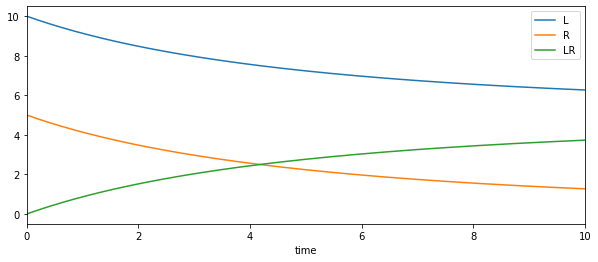

In [3]:
parameters = {"species": ["L","R","LR"],
             "InitConc": [10, 5, 0],
              #          [kf1, kb1, kf2]
             "k":        [0.02, 0.01, "NaN"]}
print(f"Parameters:\n {pd.DataFrame(parameters)}")
df,plot = simulate(steps=1000, simulation_time=10,
                   parameters=parameters, rate_eqs=ODE_eqs) 
fig = plot.get_figure()
#fig.savefig("figure.png")
df

  species  InitConc     k
0       L        10  0.02
1       R         5  0.01
2      LR         0  0.05
3       P         0   NAN
Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.917615,4.917615,0.098565,0.082385
2,0.2002,9.837243,4.837243,0.194130,0.162757
3,0.3003,9.758816,4.758816,0.286797,0.241184
4,0.4004,9.682265,4.682265,0.376664,0.317735
...,...,...,...,...,...
995,99.5996,5.000621,0.000621,0.035247,4.999379
996,99.6997,5.000616,0.000616,0.035043,4.999384
997,99.7998,5.000611,0.000611,0.034839,4.999389
998,99.8999,5.000606,0.000606,0.034636,4.999394


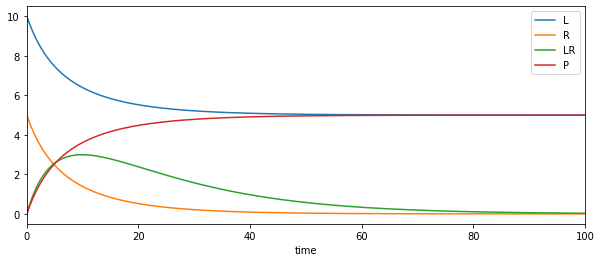

In [4]:
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             #            [kf1, kb1, kf2, ...]
             "k":        [0.02, 0.01, 0.05, "NAN"]}
print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs1a3a) 
fig = plot.get_figure()
#fig.savefig("figure.png")
df

  species  InitConc     k
0       L        10  0.01
1       R         5  0.02
2      LR         0  0.05
3       P         0   NAN
Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.964441,4.964441,0.049609,0.035559
2,0.2002,9.929259,4.929259,0.098344,0.070741
3,0.3003,9.894449,4.894449,0.146221,0.105551
4,0.4004,9.860005,4.860005,0.193252,0.139995
...,...,...,...,...,...
995,99.5996,5.072333,0.072333,0.115185,4.927667
996,99.6997,5.072071,0.072071,0.114746,4.927929
997,99.7998,5.071810,0.071810,0.114308,4.928190
998,99.8999,5.071550,0.071550,0.113873,4.928450


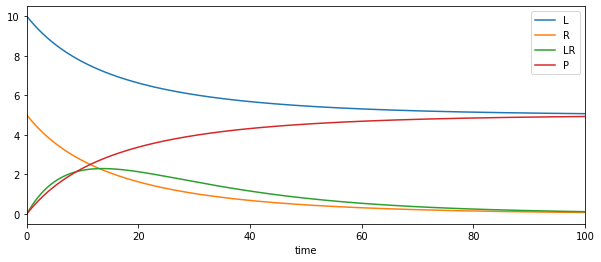

In [5]:
#“Forward Rate Parameter” ( 𝑘𝑓1 ): 0.01 , “Reverse Rate Parameter” ( 𝑘𝑏1 ): 0.02 , “k-prod” ( 𝑘𝑓2 ): 0.05
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             #           [kf1, kb1, kf2, ...]              
             "k":        [0.01, 0.02, 0.05, "NAN"]}
print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs1a3a) 
fig = plot.get_figure()
#fig.savefig("figure.png")
df

  species  InitConc     k
0       L        10  0.02
1       R         5  0.01
2      LR         0   0.5
3       P         0   NAN
Number of species: 4


,time,L,R,LR,P
0,0.0000,10.000000,5.000000,0.000000,0.000000
1,0.1001,9.903287,4.903287,0.096159,0.096713
2,0.2002,9.809345,4.809345,0.184779,0.190655
3,0.3003,9.718059,4.718059,0.266346,0.281941
4,0.4004,9.629324,4.629324,0.341317,0.370676
...,...,...,...,...,...
995,99.5996,5.000144,0.000144,0.000035,4.999856
996,99.6997,5.000142,0.000142,0.000035,4.999858
997,99.7998,5.000141,0.000141,0.000034,4.999859
998,99.8999,5.000139,0.000139,0.000034,4.999861


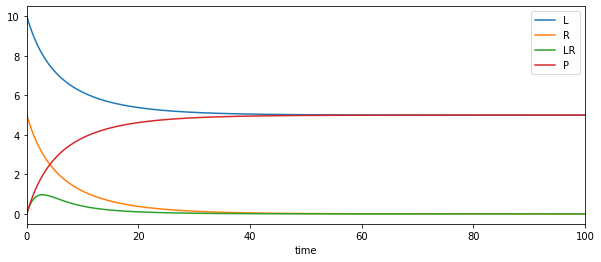

In [6]:
#“Forward Rate Parameter” ( 𝑘𝑓1 ): 0.02, “Reverse Rate Parameter” ( 𝑘𝑏1 ): 0.01 , “k-prod” ( 𝑘𝑓2 ): 0.5
parameters = {"species": ["L","R", "LR", "P"],
             "InitConc": [10, 5, 0, 0],
             "k":        [0.02, 0.01, 0.5, "NAN"]}
print(pd.DataFrame(parameters))
df,plot = simulate(steps=1000, simulation_time=100,
                   parameters=parameters, rate_eqs=ODE_eqs1a3a) 
fig = plot.get_figure()
#fig.savefig("figure.png")
df

<p><strong>Bonus</strong></p>
<p>This same reaction can be used to describe Michaelis-Menten enzyme kinetics, in which substrate (S) binds a protein enzyme (E) to form an encounter complex (E∙S), and then chemically converts to product (E + P).</p>


$$E + S \underset{k_{b1}}{\stackrel{k_{f1}}{⥂}} E\cdot S \stackrel{k_{cat}}{\to} E + P$$




<p>Suppose an enzyme has <em>k</em><sub>f1</sub> = 10<sup>7</sup> s<sup>-1</sup>, <em>k</em><sub>b1</sub> = 10<sup>6</sup> s<sup>-1</sup> and <em>k</em><sub>cat</sub> = 10<sup>4</sup> s<sup>-1</sup>. By adjusting parameters in the function above, which of these rates constants would you say most sensitively controls the overall rate of catalysis?</p>
<section class="footnotes">
<hr>
<ol>
<li id="fn_note1"><p>Note that this last kinetic step is “one-way”, which violates thermodynamics (!). Don’t worry about this yet (we’re getting to kinetics soon in the lecture). For now, suffice it to say that here we invoke the assumption that the back rate is very small compared to forward rate.<a href="#fn_note1" class="footnote-back">↩</a></p></li>
</ol>
</section>

